直線のあてはめ
===
by ほげにむし


---
$N$個のデータ : $(x_1,y_1), \cdots (x_N, y_N)$ 

---


これによく合う直線をあてはめたい。

いろいろなデータを使ってみる
---


まず、プロットとデータ読み込みに必要なモジュールをimportしておく。

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as npimport
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline


まずは簡単なデータからはじめよう。統計科学研究所から成績データのサンプルを頂いてくる。Pythonから直接URLにアクセスするために、ioとrequestsモジュールをimportしよう。

In [12]:
import io
import requests
score_url = "http://www.statistics.co.jp/reference/statistical_data/seiseki.csv"
score_data = requests.get(score_url).content
score=pd.read_csv(io.StringIO(score_data.decode('utf-8')))
score

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6
3,95,87,77,100,77,82,78,96,87
4,70,71,78,67,72,82,46,63,44
5,67,53,56,61,61,76,70,66,40
6,29,26,44,52,37,68,33,43,13
7,56,54,37,59,35,64,53,67,7
8,45,21,7,44,16,52,34,46,3
9,68,41,29,81,55,71,29,72,51


165人分の9科目のデータであることがわかる。

科目をを二つ選んで、それぞれの関連を見るために、pairplotという関数が用意されているので、それを使ってみよう。
実行にはしばらく時間がかかる。

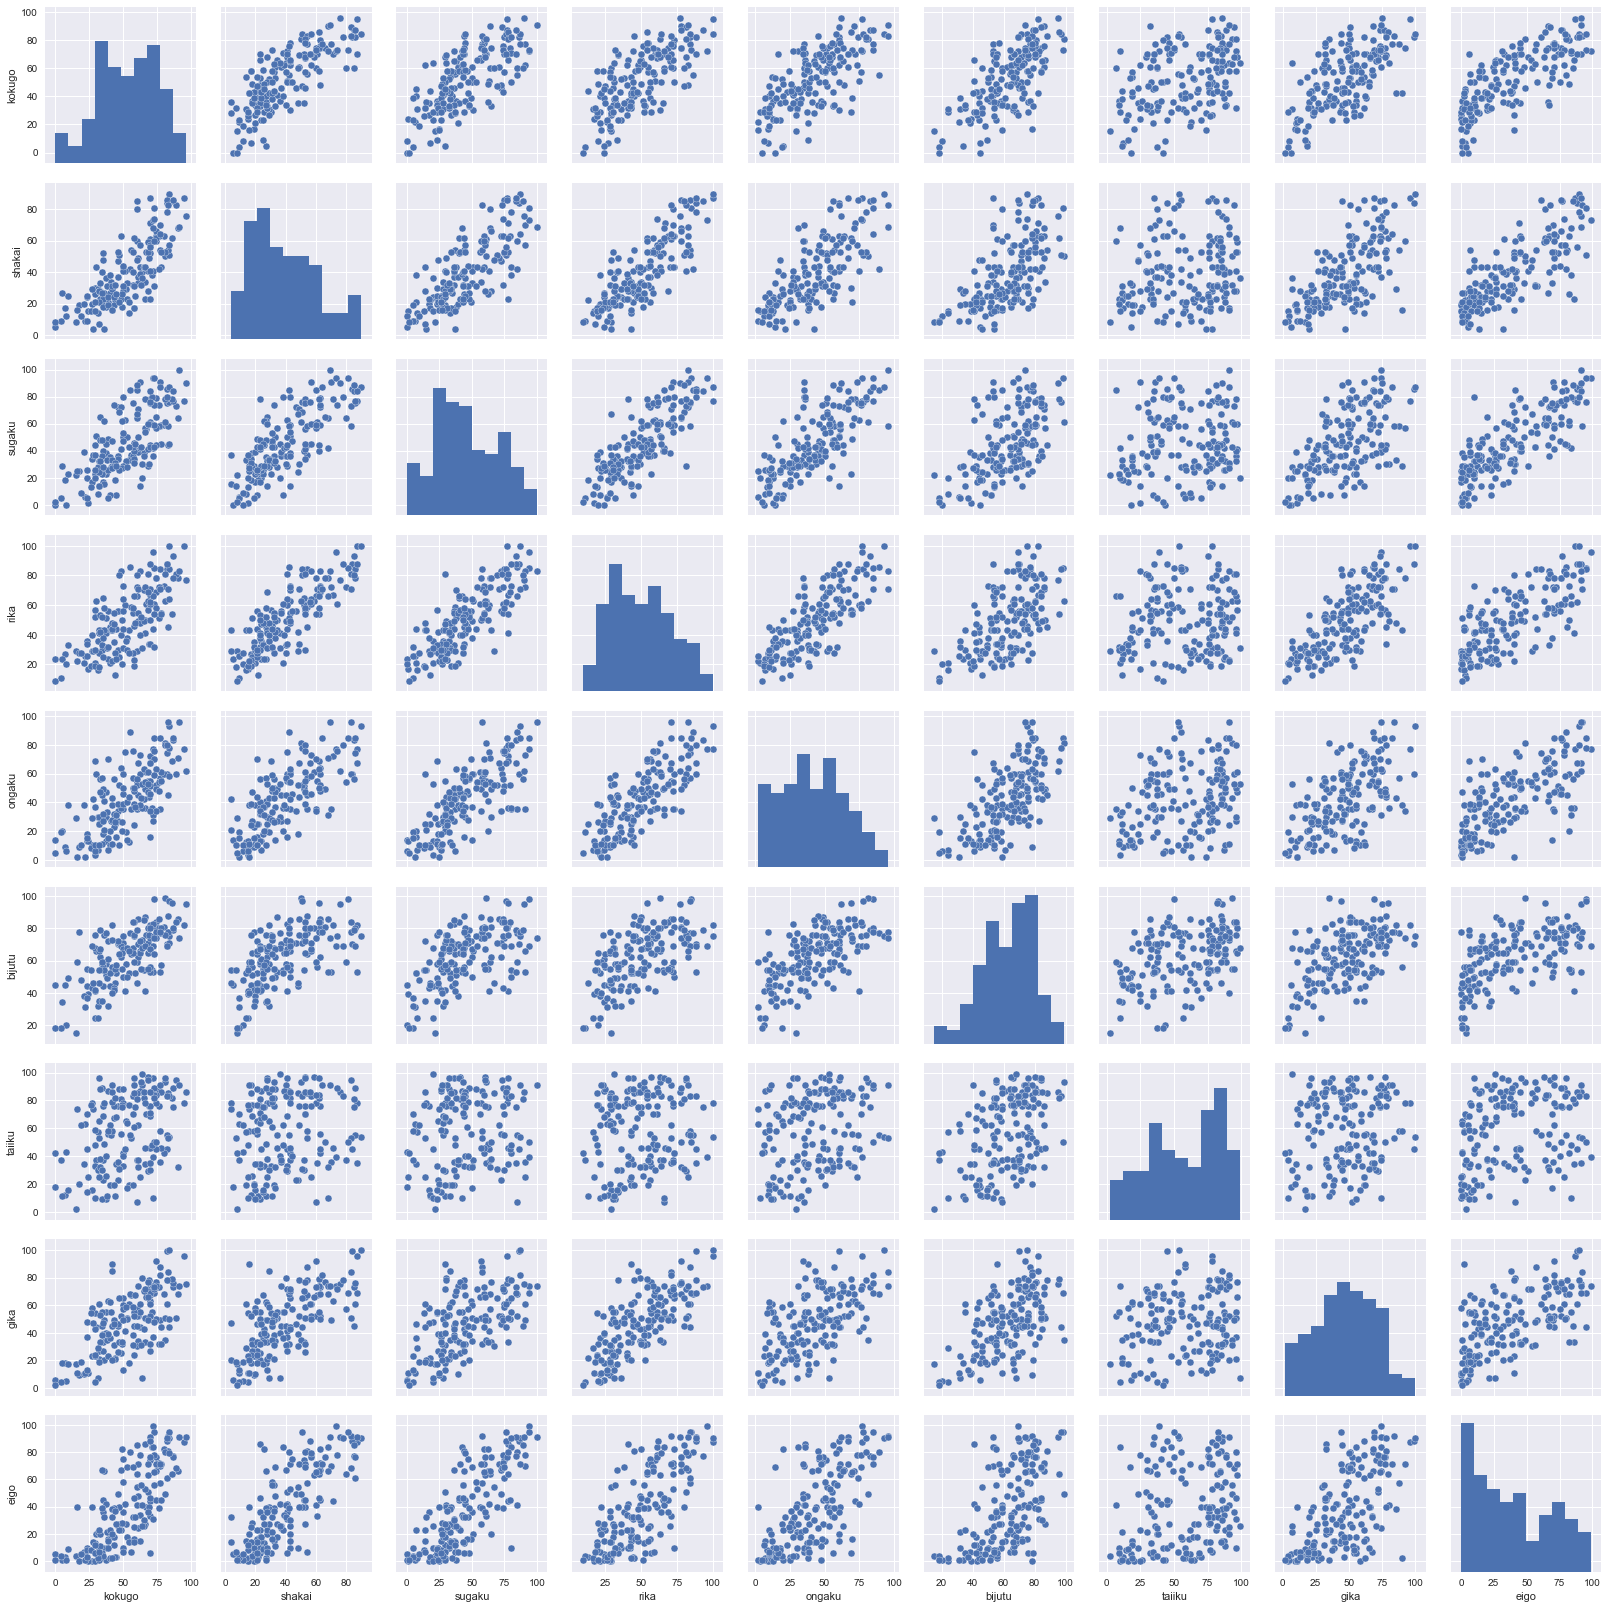

In [13]:
sns.pairplot(score)

意味のある組み合わせは $\frac{n(n-1)}{2}-n$ 個ある。また対角線はその科目のヒストグラムで、それぞれの散布図は対角線で対称になっている。

さて、数学と理科が関連が強いようなので、これを取り出して詳しく見てみよう。

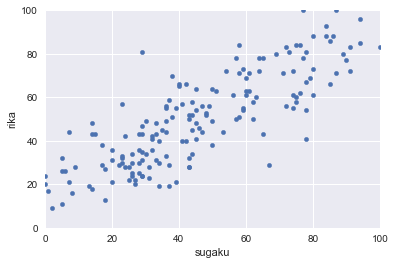

In [18]:
score.plot(x='sugaku',y='rika',kind='scatter',xlim=(0,100),ylim=(0,100))

C:\Users\okuyama\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


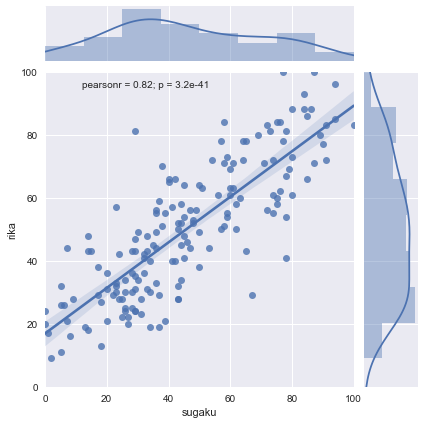

In [24]:
sns.jointplot(kind='reg',x="sugaku", y="rika", data=score,xlim=(0, 100), ylim=(0, 100))

例外はあるものの、左上に点が伸びていることがわかる。これは、相関があるということだ。

数学と体育はどうだろうか？

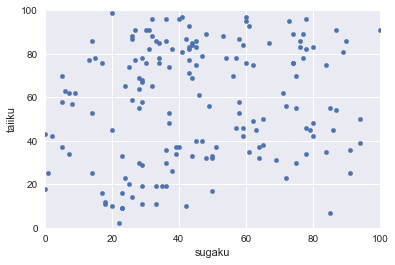

In [20]:
score.plot(x='sugaku',y='taiiku',kind='scatter',xlim=(0,100),ylim=(0,100))

C:\Users\okuyama\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


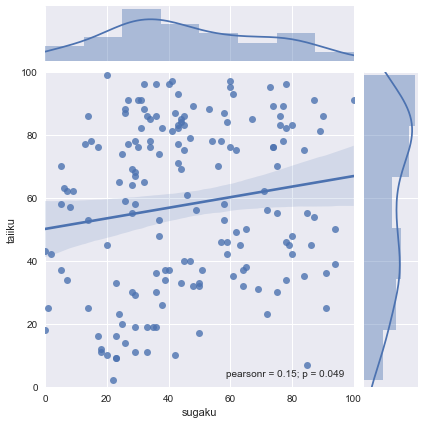

In [26]:
sns.jointplot(kind='reg',x="sugaku", y="taiiku", data=score,xlim=(0, 100), ylim=(0, 100))

あー。まったく相関がなさそうである。

だが現実世界を考えると、このグラフ理解できるだろう。
点群を4つ分類するとこんな感じだろうか？

| | |
|---|---|
|脳みそ筋肉|非の打ち所がない|
|救いようがない|おたく|

冗談はさておき、もう少し詳しく調べてみよう。OLSを使ってフィッティングのパラメータと検定の結果を表示してみよう。

まずは数学と理科。

In [21]:
数学理科model=sm.OLS(score['rika'], sm.add_constant(score['sugaku']))
数学理科関係=数学理科model.fit()
数学理科関係.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rika   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     331.5
Date:                Tue, 07 Mar 2017   Prob (F-statistic):           3.17e-41
Time:                        13:37:20   Log-Likelihood:                -651.85
No. Observations:                 166   AIC:                             1308.
Df Residuals:                     164   BIC:                             1314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         16.9289      2.048      8.265      0.000        12.884    20.973
sugaku         0.7225      0.040     18.208      0.000         0.644     0.801
==============================================================================
Omnibus:                        1.756   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.354
Skew:                           0.130   Prob(JB):                        0.508
Kurtosis:                       3.359   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

次に、数学と体育。

In [23]:
数学体育model=sm.OLS(score['rika'], sm.add_constant(score['taiiku']))
数学体育関係=数学体育model.fit()
数学体育関係.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rika   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.788
Date:                Tue, 07 Mar 2017   Prob (F-statistic):              0.183
Time:                        13:39:34   Log-Likelihood:                -742.73
No. Observations:                 166   AIC:                             1489.
Df Residuals:                     164   BIC:                             1496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         45.0553      3.974     11.337      0.000        37.208    52.903
taiiku         0.0837      0.063      1.337      0.183        -0.040     0.207
==============================================================================
Omnibus:                       14.180   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.775
Skew:                           0.279   Prob(JB):                       0.0338
Kurtosis:                       2.183   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

さて、これらの結果から何が言えるだろうか？今回はR-squaredを考えてみることにしよう。

R-squaredは決定係数（coefficient of determination）と呼ばれ、独立変数が従属変数のどれくらいを説明できるかを表す値である。
標本値から求めた回帰方程式のあてはまりの良さの尺度として利用される。

定義は以下である。
$$R^2=1-\frac{\sum_i (y_i - f({\bf x}_i))^2}{\sum_i (y_i - \bar{y})^2}$$

ただし、データを$({\bf x}_i,y_i)$、$f({\bf x}_i)$は${\bf x}_i$から$y_i$を推定する式、$\bar{y}$は$y_i$の平均値である。
誤差の大きさはデータによって変わってしまうので、$y$の分散で正規化していると考えることができる。

また、$R^2$は寄与率と呼ばれることもある。

この式の第2項の分子は、推定の誤差そのものである。大きくなればなるほど、直線のあてはめがあてにならないということである。つまり、決定係数が小さいと、推定した直線が意味を持たないものになるということである。

数学と理科の決定係数は0.7, 体育と理科の決定係数は0.01である。
2つのデータ間に関連があるかないかを客観的に論じたい場合、この数値が役に立つ。
図を見た感覚を言葉で綴るよりも、数値があったほうが議論がしやい。

最小二乗法を使った場合、相関係数の二乗は決定係数と一致するが、一般にそうなるとは言えない。

C:\Users\okuyama\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


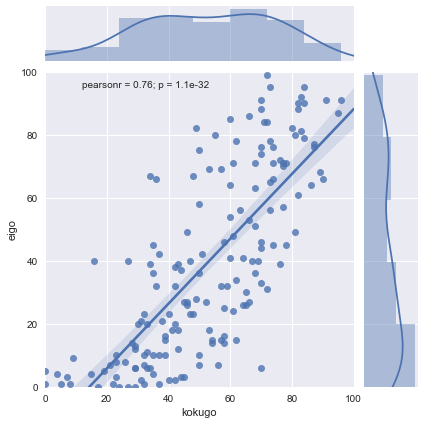

In [27]:
sns.jointplot(kind='reg',x="kokugo", y="eigo", data=score,xlim=(0, 100), ylim=(0, 100))

In [28]:
国語英語model=sm.OLS(score['eigo'], sm.add_constant(score['kokugo']))
国語英語関係=国語英語model.fit()
国語英語関係.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eigo   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     226.3
Date:                Tue, 07 Mar 2017   Prob (F-statistic):           1.09e-32
Time:                        14:15:33   Log-Likelihood:                -724.93
No. Observations:                 166   AIC:                             1454.
Df Residuals:                     164   BIC:                             1460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -14.7613      3.877     -3.807      0.000       -22.417    -7.106
kokugo         1.0289      0.068     15.042      0.000         0.894     1.164
==============================================================================
Omnibus:                        2.920   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.869
Skew:                           0.270   Prob(JB):                        0.238
Kurtosis:                       2.649   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

これは、2次の項を含んだ方がよさそうである。

多項式であてはめを行うために、少し工夫をしよう。

numpyを使ってデータxのの$x^2$, $x$, 1を含む配列を作り、$3$変数の線形回帰を行う。

In [44]:
import numpy as np
y = score['eigo'].values
kok = score['kokugo'].values
samples, = kok.shape
X = np.column_stack((kok**2, kok, np.ones(samples)))
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     121.2
Date:                Tue, 07 Mar 2017   Prob (F-statistic):           5.74e-33
Time:                        15:00:10   Log-Likelihood:                -721.29
No. Observations:                 166   AIC:                             1449.
Df Residuals:                     163   BIC:                             1458.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0074      0.003      2.706      0.0

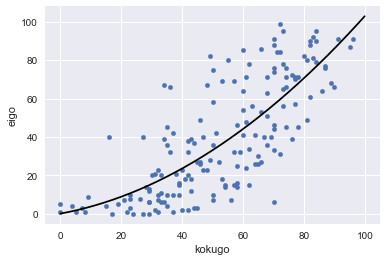

In [53]:
import matplotlib.pyplot as plt

score.plot(kind='scatter',x='kokugo',y='eigo')
inx=np.arange(0, 100, 0.1)
a,b,c, =res.params
plt.plot(inx, a*inx**2 + b*inx +c, color='k'  )